### Imports
Ушбу лойиҳада биз машинали ўқитиш бўйича стандарт кутубхоналардан фойдаланамиз.

In [53]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Imputing missing values and scaling values
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate, cross_val_predict
# Machine Learning Models


#import sklearn dependencies
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
    
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings
warnings.filterwarnings('ignore')    

### Маълумотларни ўқитиш.
Дастлаб аввалги дафтарнинг форматланган маълумотларини ўқиб чиқамиз.

In [54]:
# Read in data into dataframes 
features = pd.read_excel('Datasets/1_Rasulov_133/output.xlsx')
labels = pd.read_csv('Datasets/1_Rasulov_133/act_133.txt')

# Display sizes of data
print('Feature Size: ', features.shape)
print('Labels Size:  ', labels.shape)


Feature Size:  (133, 3223)
Labels Size:   (133, 1)


<AxesSubplot:xlabel='Синиш кўрсатгичи', ylabel='Density'>

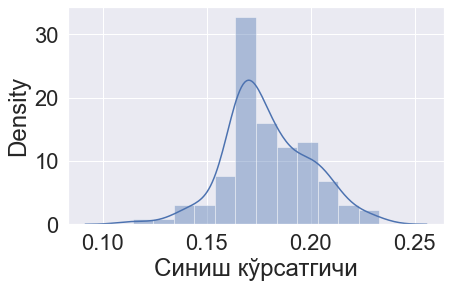

In [55]:
y = np.log10(labels)
sns.distplot(y, axlabel = 'Синиш кўрсатгичи')


In [56]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(features)

# Transform both the training and testing data
X_new = scaler.transform(features)
y_train = np.array(y).reshape((-1, ))

Эслатиб ўтамиз, бу ерда форматланган маълумотлар қандай кўринишга эга. Биринчи дафтарда биз ўзгарувчиларнинг табиий журналини олиш орқали бир қатор хусусиятларни ишлаб чиқдик, юқори даражадаги чизиқли хусусиятларни олиб ташлаш орқали дескрипторларни бир қисмини танладик.

In [57]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
            
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)    
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)             
            # If correlation exceeds the threshold
            if val >= threshold:
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops) 
               
    return x

In [58]:
X_train = remove_collinear_features(features, 0.9)

In [62]:

print(X_train.shape)
print(y.shape)


(133, 836)
(133, 1)


Қуйида активликни тақсимланиш кўрсатилган.

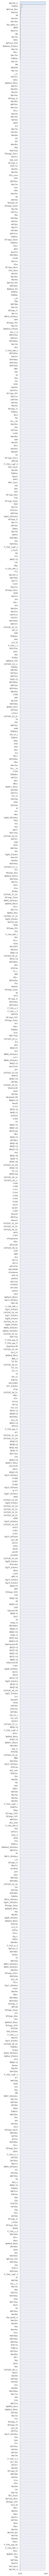

In [63]:
from rfpimp import *
from rfpimp import *
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train,y_train, test_size=0.20)
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train1, y_train1)

imp = importances(rf, X_test1, y_test1) # permutation

#viz = plot_importances(imp)
#viz.view()

In [88]:
column = imp.Importance.iloc[1:10].index
X_train_feature = X_train.get(column)

In [135]:
def models(x,y):
    #creating model object
    seed = 2; n_jobs_param = -1;
    lr = LinearRegression(n_jobs=n_jobs_param)
    lasso = Lasso(random_state=seed)
    ridge = Ridge(random_state=seed)
    en = ElasticNet(random_state=seed)
    lar = Lars()
    llar = LassoLars()
    omp = OrthogonalMatchingPursuit()
    br = BayesianRidge()
    ard = ARDRegression()
    par = PassiveAggressiveRegressor(random_state=seed)
    ransac = RANSACRegressor(min_samples=0.5, random_state=seed)
    tr = TheilSenRegressor(random_state=seed, n_jobs=n_jobs_param)
    huber = HuberRegressor()   
    kr = KernelRidge()
    svm = SVR()
    knn = KNeighborsRegressor(n_jobs=n_jobs_param)
    dt = DecisionTreeRegressor(random_state=seed)
    rf = RandomForestRegressor(random_state=seed, n_jobs=n_jobs_param)
    et = ExtraTreesRegressor(random_state=seed, n_jobs=n_jobs_param)
    ada = AdaBoostRegressor(random_state=seed)
    gbr = GradientBoostingRegressor(random_state=seed)
    mlp = MLPRegressor(random_state=seed)
    #xgboost = XGBRegressor(random_state=seed, n_jobs=n_jobs_param, verbosity=0)
    #lightgbm = lgb.LGBMRegressor(random_state=seed, n_jobs=n_jobs_param)
    #catboost = CatBoostRegressor(random_state=seed, silent = True, thread_count=n_jobs_param)
    
    estimators = {#'Linear Regression' : lr,
              'Lasso Regression' : lasso, 
              'Ridge Regression' : ridge, 
              'Elastic Net' : en,
              ##'Least Angle Regression' : lar, 
              'Lasso Least Angle Regression' : llar, 
              'Orthogonal Matching Pursuit' : omp, 
              'Bayesian Ridge' : br, 
              'Automatic Relevance Determination' : ard,
              'Passive Aggressive Regressor' : par, 
              ##'Random Sample Consensus' : ransac,
              'TheilSen Regressor' : tr, 
              'Huber Regressor' : huber, 
              'Kernel Ridge' : kr,
              'Support Vector Machine' : svm, 
              'K Neighbors Regressor' : knn, 
              'Decision Tree' : dt, 
              'Random Forest' : rf, 
              'Extra Trees Regressor' : et,
              'AdaBoost Regressor' : ada,
              'Gradient Boosting Regressor' : gbr, 
              'Multi Level Perceptron' : mlp
              ##'Extreme Gradient Boosting' : xgboost,
              ##'Light Gradient Boosting Machine' :  lightgbm,
              ##'CatBoost Regressor' : catboost
             }
    result =pd.DataFrame()
    for name, estimator in estimators.items():    
        bgg_model = BaggingRegressor(estimator, random_state=seed).fit(X_new, y)
        ada_model = AdaBoostRegressor(estimator, random_state=seed).fit(X_new, y)
        
        i =0
        for model in [estimator,bgg_model,ada_model]:
            i=i+1
            score = cross_validate(model, x, y,
                                   scoring=['neg_root_mean_squared_error'],
                                   n_jobs=-1, verbose=0)
            if i==1:
                data = {'model':[name], 'RMSE':[-np.mean(score['test_neg_root_mean_squared_error'])],}                
            if i==2:
                data = {'model':['BG-'+name], 'RMSE':[-np.mean(score['test_neg_root_mean_squared_error'])],}                
            if i==3:
                data = {'model':['AR-'+name], 'RMSE':[-np.mean(score['test_neg_root_mean_squared_error'])],}                
        
            result = pd.concat([result,pd.DataFrame(data)],axis=0,ignore_index=True)           
    
    return result


In [136]:
results = pd.DataFrame()
for train in [[X_train,y_train],[X_train_feature,y_train]]:
    result = models(x=train[0],y=train[1])
    results_sing = result.sort_values('RMSE', ascending = True)
    result['sort']=0
    result['sort'].iloc[results_sing.index.values] = list(range(len(result.index)))
    results = pd.concat([results,result],axis=1)

In [137]:
#results_sing = result.sort_values('RMSE', ascending = True)
#print(results_sing.index+1)
#result['sort'].iloc[results_sing.index.values] = list(range(len(result.index)))
#print(results)
#[result.index[i] for i in range(result.shape[0])]


In [138]:
results.to_excel('Datasets/1_Rasulov_133/result_133.xlsx', index = True) 

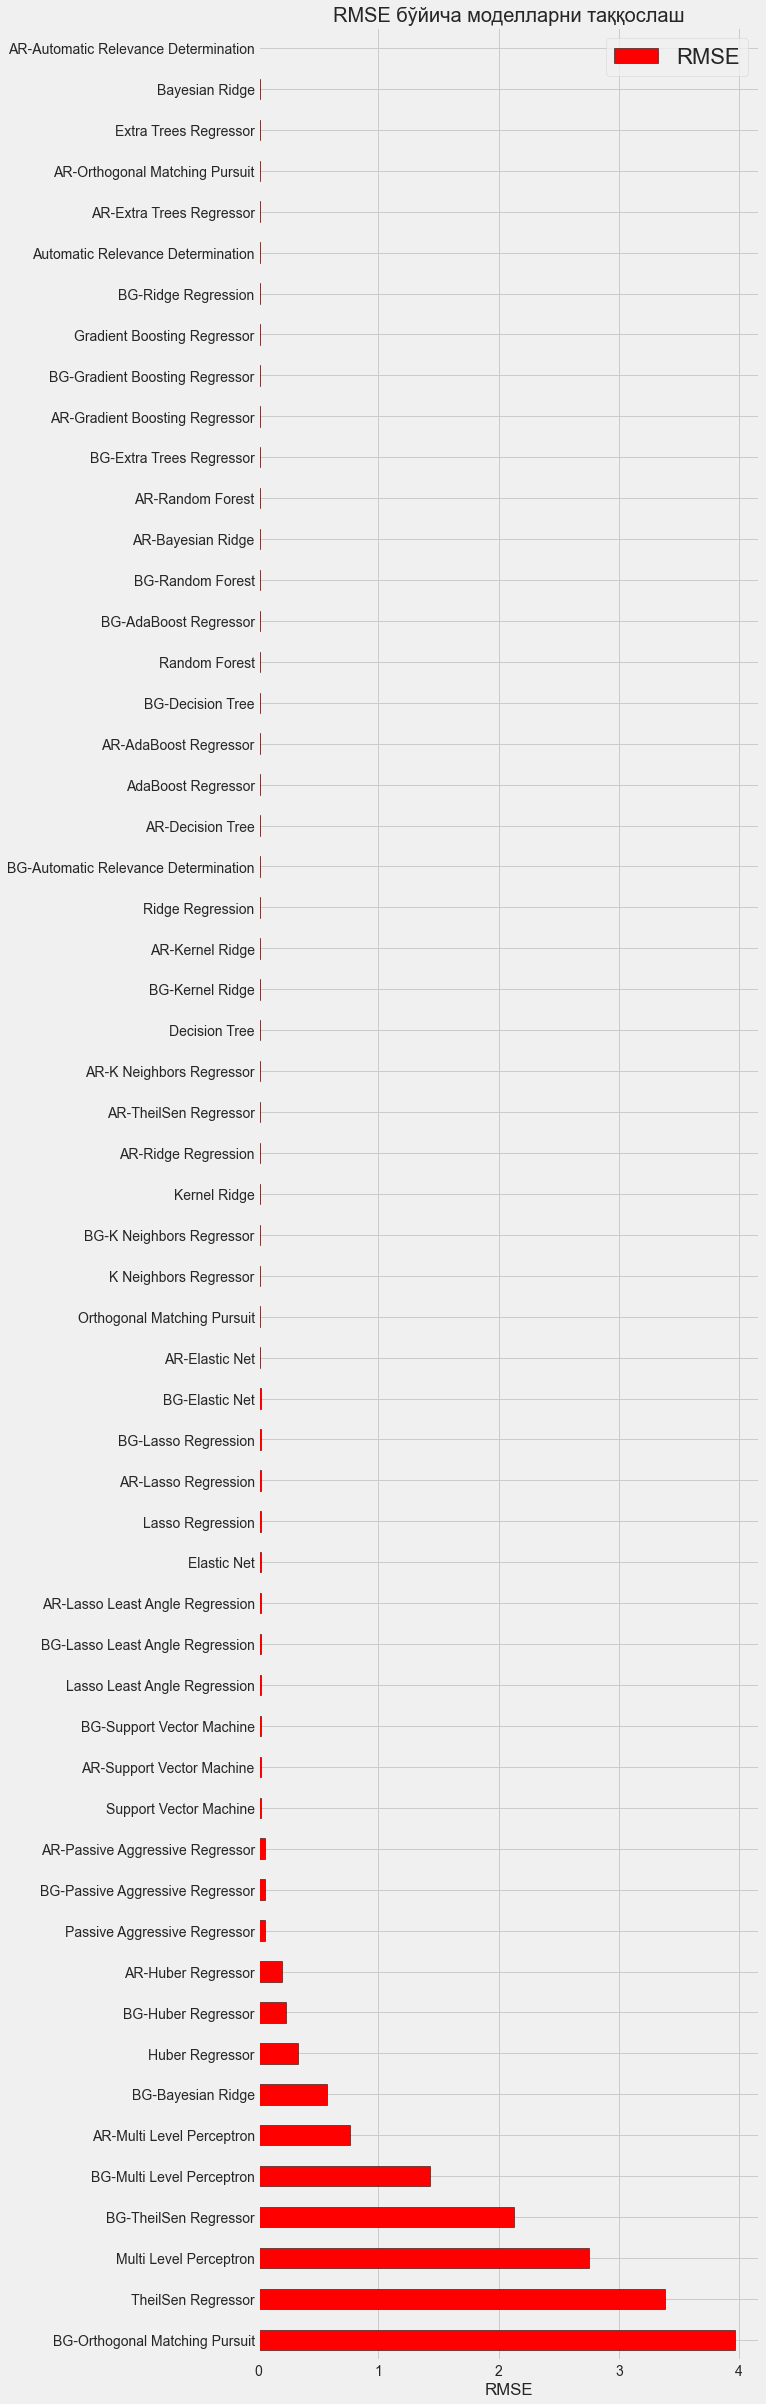

In [45]:
plt.style.use('fivethirtyeight')
figsize(8, 40)
# Horizontal bar chart of test mae
result.sort_values('RMSE', ascending = False).plot(x = 'model', y = 'RMSE', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('RMSE'); plt.xticks(size = 14)
plt.title('RMSE бўйича моделларни таққослаш', size = 20);

In [43]:
result_single_bgg_ar = result.sort_values('RMSE', ascending = True)

In [50]:
result_single_bgg_ar.to_excel('Datasets/1_Rasulov_133/result_133.xlsx', index = True)     

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

### Машинада ўрганиш моделларини баҳолаш ва таққослаш
Ушбу бўлимда биз назорат қилинадиган регрессия масаламиз учуниз учун бир нечта машиналарни ўрганиш усулларини яратамиз, ўқитамиз ва баҳолаймиз. Мақсад қайси моделни янада ривожлантириш учун кўпроқ умид бахш этишини аниқлашдир (масалан, гиперпараметрни созлаш).


### Дескрипторларни нормаллаштириш.
Моделларимизни яратишимиздан олдин бажариладиган сўнгги қадам - бу дескрипторларни нормаллаштиришдир. Бу керак, чунки дескрипторлар турли хил бирликларда бўлади ва биз дескриптоларни нормаллаштиришни хоҳлаймиз, шунинг учун бирликлар алгоритмга таъсир қилмайди. Бир нечта алгоритмларни таққослаганда дескрипторларни нормаллаштириш энг яхши амалиётдир.

Дескрипторларни нормаллаштиришнинг икки йўли мавжуд:

1. Ҳар бир қиймат учун хусусиятнинг ўртача қийматини олиб ташланг ва хусусиятнинг стандарт оғишига бўлинг. Бу стандартлаштириш деб номланади ва натижада ҳар бир хусусият ўртача 0 га ва стандарт оғиш 1 га тенг бўлади.
2. Ҳар бир қиймат учун хусусиятнинг минимал қийматини чиқариб олинг ва функтсия учун минимал (минус) минусни максималга бўлинг. Бу функтсия учун барча қийматлар 0 дан 1 гача бўлишига ва интервалгача миқёси ёки нормализатсия деб номланишига ишонч ҳосил қилади.

Биз ҳам нормаллаштирилган объектини ўргатсак, биз фақат ўқув мажмуасидан фойдаланишни хоҳлаймиз. Дескрипторларни ўзгартирганда, биз ҳам ўқув мажмуасини, ҳам синов тўпламини ўзгартирамиз.


In [10]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X_train)

# Transform both the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Convert y to one-dimensional array (vector)
y_train = np.array(y_train).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))


### Баҳолаш учун моделлар
Биз ажойиб Scikit-Learn кутубхонасидан фойдаланган ҳолда беш хил машинани ўрганиш моделларини таққослаймиз:

1. Linear Regression
2. Support Vector Machine Regression
3. Random Forest Regression
4. Gradient Boosting Regression
5. K-Nearest Neighbors Regression

Биз бу моделларни қандай ишлашини тушунтиришдан кўра, амалга оширишга эътибор қаратмоқчимиз.

Моделларни таққослаш учун биз асосан гиперпараметрлар учун Scikit-Learn стандартларини ишлатамиз. Умуман олганда, улар яхши ишлайди, лекин моделни ишлатишдан олдин оптималлаштириш керак. Аввалига биз ҳар бир моделнинг бошланғич кўрсаткичларини аниқламоқчимиз, сўнгра гиперпараметрни созлаш ёрдамида янада оптималлаштириш учун энг яхши ишлайдиган моделни танлашимиз мумкин. Шуни эсда тутингки, стандарт гиперпараметрлар моделни ишга туширади, аммо деярли ҳар доим сизнинг муаммоингиз учун энг яхши созламаларни топиш учун қандайдир қидирув ёрдамида созланиши керак!

Scikit-Learn нинг энг яхши бўлимларидан бири шундаки, барча моделлар бир хил тарзда амалга оширилади: қандай қилиб уни яратишни билсангиз, сиз жуда хилма-хил моделларни амалга оширишингиз мумкин. Бу эрда биз бир нечта моделлар учун бир қатор кодлар бўйича барча ўқув(train) ва синов(test) жараёнларини амалга оширамиз.

In [25]:
from sklearn.model_selection import train_test_split

X = np.concatenate((X, X_test, X_external), axis=0)
y = np.concatenate((y, y_test, y_external), axis=None)
X_train, X_external, y_train, y_external = train_test_split(X,y, test_size=0.2, random_state=42)  #y_power.reshape(1,-1)[0]
def TrainTest(train,target,state):
    X_train, X_test, y_train, y_test = train_test_split(train,target, test_size=0.2,random_state=state)  #y_power.reshape(1,-1)[0]
    return X_train, X_test, y_train, y_test

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold, cross_val_score


def statistica(y, y_pred):
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))   
    return [r2, rmse]

In [27]:

dt_model = DecisionTreeRegressor(random_state=2)
bgg_model_dt = BaggingRegressor(dt_model,random_state=2)

etree_model = ExtraTreeRegressor(random_state=2)
bgg_model_etree = BaggingRegressor(etree_model,random_state=2)

rf_model = RandomForestRegressor(random_state=2)
et_model = ExtraTreesRegressor(random_state=2)

ada_model_dt = AdaBoostRegressor(dt_model, random_state=2)
ada_model_etree = AdaBoostRegressor(etree_model, random_state=2)

gb_model = GradientBoostingRegressor(random_state=2)
xgb_model = xgb.XGBRegressor(random_state=2)
lgb_model = lgb.LGBMRegressor( random_state=2)

import numpy as np
a = np.zeros((3,2))
bgg_results = pd.DataFrame()
for i in range(10):    
    X_train_train, X_test, y_train_train, y_test =TrainTest(X_train,y_train,i)
    for bgg_model in [bgg_model_dt,bgg_model_etree,rf_model,et_model,ada_model_dt,ada_model_etree,gb_model,xgb_model,lgb_model]: 
        bgg_result = pd.DataFrame()
        bgg_model.fit(X_train_train, y_train_train)
        for pair in [[X_train_train,y_train_train],[X_test,y_test],[X_external,y_external]]:        
            bgg_scores = statistica(pair[1], bgg_model.predict(pair[0]))         
            #if bgg_scores[0] > 0.9:
            bgg_data = {'R^2':[bgg_scores[0]], 'RMSE':[bgg_scores[1]],}                
            bgg_result = pd.concat([bgg_result,pd.DataFrame(bgg_data)],axis=1)
        
    
    
        bgg_result = pd.concat([bgg_result,pd.DataFrame(['{0}_training_{1}'.format(i+1,type(bgg_model).__name__)]),pd.DataFrame(['{0}'.format(bgg_model)])],axis=1) 
        #print(bgg_result)
        bgg_results = pd.concat([bgg_results,bgg_result],axis=0,ignore_index=True)
    
    a = np.concatenate((a, [[X_train_train,y_train_train],[X_test,y_test],[X_external,y_external]]), axis=0)
    
    
    
bgg_results.columns=["R^2_train","RMSE_train","R^2_test", "RMSE_test","R^2_external","RMSE_external","model","models"]

print(bgg_results)


[02:51:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:51:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:51:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:52:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:52:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:52:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:52:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:52:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:52:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [28]:
row_idx = bgg_results.RMSE_test.idxmin()
best_model_result = bgg_results.iloc[[row_idx]]
print('Энг яхши модел натижаси')
display(best_model_result)

Энг яхши модел натижаси


,R^2_train,RMSE_train,R^2_test,RMSE_test,R^2_external,RMSE_external,model,models
21,0.997203,0.001313,0.989905,0.00268,0.983059,0.00307,3_training_ExtraTreesRegressor,ExtraTreesRegressor(random_state=2)


In [41]:
X_train = a[9,0]; y_train = a[9,1]
X_test = a[10,0];  y_test = a[10,1]
X_external = a[11,0];  y_external = a[11,1]

In [46]:
#et_model.fit(X_train, y_train)
#bgg_scores = statistica(y_external, et_model.predict(X_external))                     
#{'R^2':[bgg_scores[0]], 'RMSE':[bgg_scores[1]],}  

{'R^2': [0.9830585580285943], 'RMSE': [0.0030698731384547592]}

In [32]:
pd.DataFrame(X_train).to_csv('data/training_features_new.csv', index = False)
pd.DataFrame(X_test).to_csv('data/testing_features_new.csv', index = False)
pd.DataFrame(X_external).to_csv('data/external_features_new.csv', index = False)
pd.DataFrame(y_train).to_csv('data/training_labels_new.csv', index = False)
pd.DataFrame(y_test).to_csv('data/testing_labels_new.csv', index = False)
pd.DataFrame(y_external).to_csv('data/external_labels_new.csv', index = False)

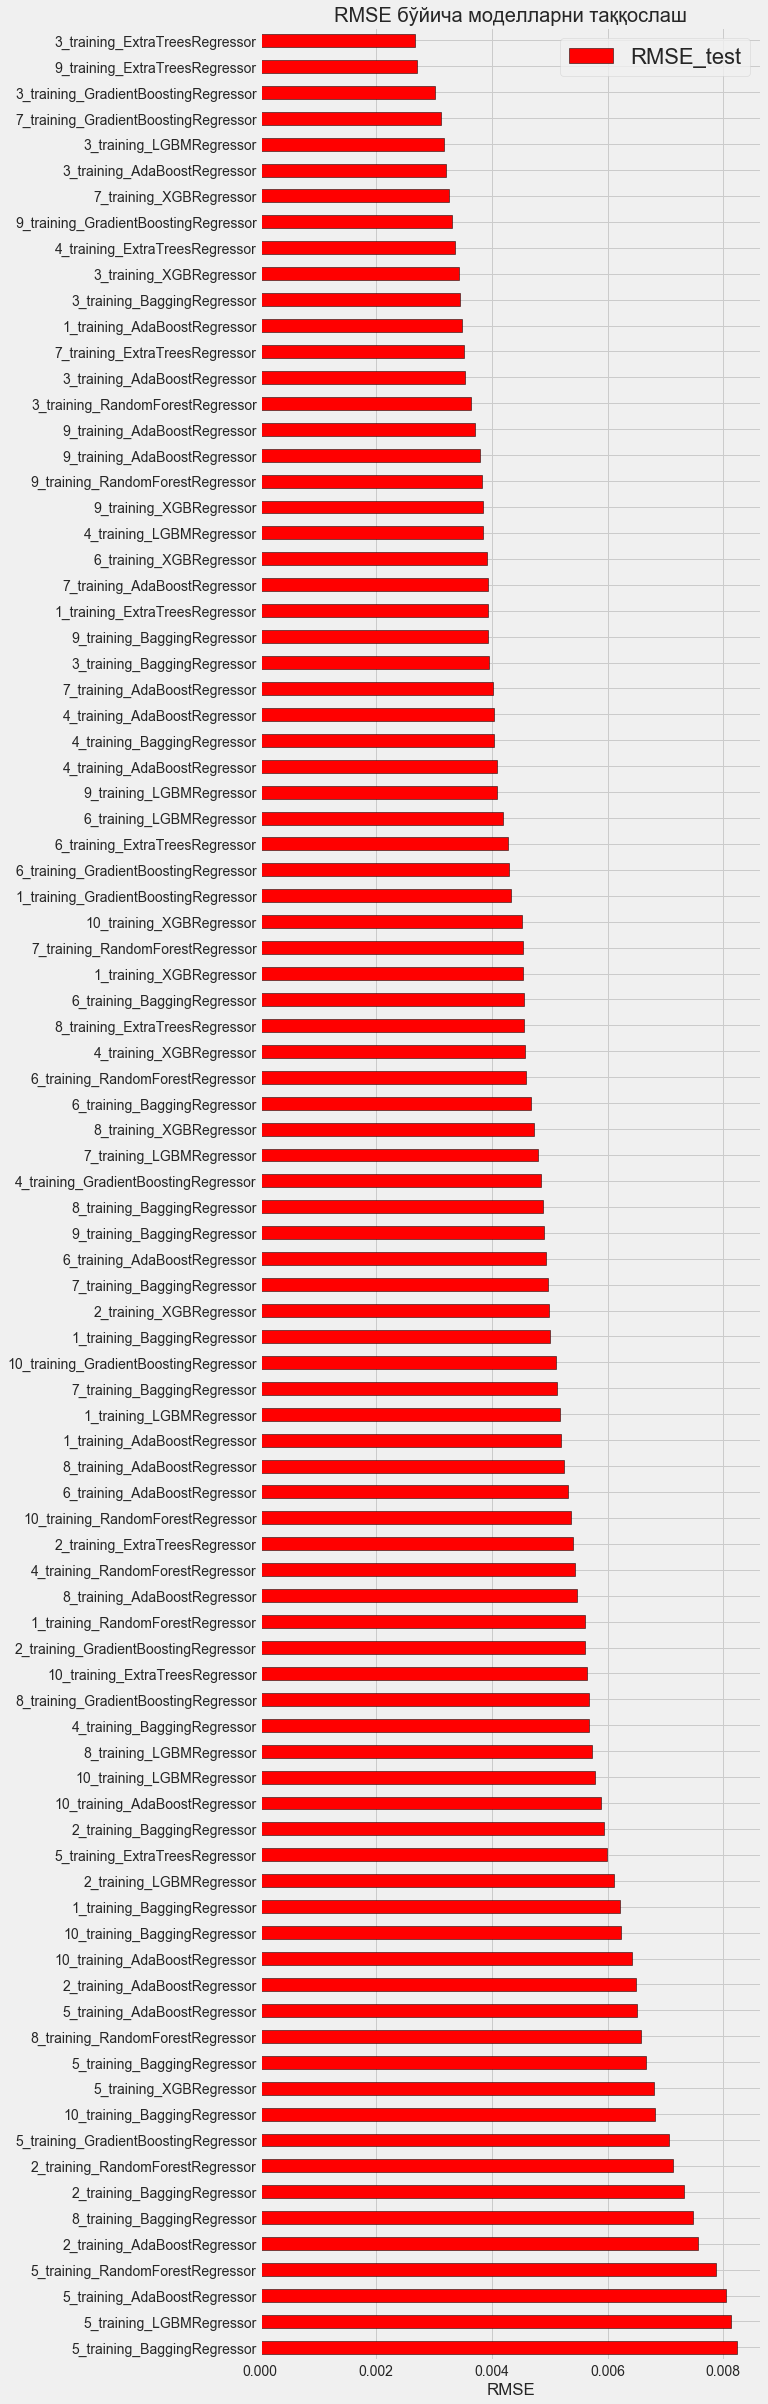

In [47]:
plt.style.use('fivethirtyeight')
figsize(8, 40)
# Horizontal bar chart of test mae
bgg_results.sort_values('RMSE_test', ascending = False).plot(x = 'model', y = 'RMSE_test', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('RMSE'); plt.xticks(size = 14)
plt.title('RMSE бўйича моделларни таққослаш', size = 20);

Бажарилишига қараб (аниқ натижалар ҳар сафар бироз ўзгариб туради) Extra Trees Regressor, энг яхши натижа берди. Шуни тан олишим керакки, бу энг адолатли таққослаш эмас, чунки биз асосан стандарт гиперпараметрлардан фойдаланмоқдамиз. Extra Trees Regressor усули бошлаш учун жуда яхши, чунки ишлаш модел параметрларига унчалик боғлиқ эмас. Шунга қарамай, ушбу натижалардан хулоса қилишимиз мумкинки, машинали ўқитиш амал қилади, чунки барча моделлар дастлабки даражадан анча устундир!

Бу ерда биз гиперпарамтерларни созлашмида энг яхши моделни оптималлаштиришга эътибор қаратаман. Ушбу натижаларни ҳисобга олган ҳолда, биз Extra Trees Regressor -дан фойдаланишга эътибор қаратамиз. 


### Моделни оптималлаштириш
Машинали ўқитишда моделни оптималлаштириш маълум бир муаммо учун энг яхши гиперпараметрлар тўпламини топишни англатади.

#### Гиперпараметрлар
Гиперпараметрларни танлашда муаммо шундаки, барча муаммолар бўйича ҳеч қандай тўплам яхши ишламайди. Шунинг учун ҳар бир янги маълумотлар тўплами учун энг яхши созламаларни топишимиз керак. Бу кўп вақт талаб қиладиган жараён бўлиши мумкин, аммо бахтга кўра Scikit-Learn-да ушбу процедурани бажариш учун бир нечта вариант мавжуд.


### Тасодифий қидириш(Random Search) ва ўзаро текширув(Cross Validation) ёрдамида гиперпараметрларни созлаш.
Биз тасодифий қидириш ва ўзаро фаолият текшириш орқали модел учун энг яхши гиперпараметрларни танлашимиз мумкин.

Тасодифий қидириш биз баҳолаш учун гиперпараметрларни танлаш усулини англатади: биз бир қатор вариантларни аниқлаймиз, сўнгра синаш учун комбинацияларни тасодифий танлаймиз. Бу биз кўрсатган ҳар бир комбинацияни баҳолайдиган грид қидириш(grid search)дан фарқ қилади. Одатда, тасодифий қидириш энг яхши модел гиперпараметрлар ҳақида чекланган маълумотларга эга бўлганимизда яхшироқ бўлади ва биз тасодифий қидирув ёрдамида вариантларни камайтирамиз ва ундан кейин чекланган имкониятлар билан грид қидиришни ишлатамиз.
Cross validation - бу гиперпараметрларнинг ишлашини баҳолаш учун ишлатиладиган усул. Ўрнатилган тренингни алоҳида ўқув ва тасдиқлаш тўпламларига ажратишдан кўра, биз фойдаланишимиз мумкин бўлган маълумотларнинг миқдорини камайтиради, биз K-Fold Cross Validation-дан фойдаланамиз. Бу шуни англатадики, машғулот маълумотларини К фолдларга бўлиш, сўнгра такрорий жараённи ўташ керак, бу ерда биз аввал фолдларнинг К-1 устида машқ қиламиз, сўнгра к-катламада ишлашни баҳолаймиз. Биз бу жараённи К марта такрорлаймиз, шунинг учун биз ҳар бир такрорланишни биз ўқимаган маълумотлар бўйича синовдан ўтказадиган калит билан ўқув маълумотларининг ҳар бир мисолида синаб кўрган бўламиз. К-катлама ўзаро текширишни якунида биз ҳар бир К такрорлаш бўйича ўртача хатони якуний кўрсаткич сифатида қабул қиламиз ва кейин моделни бир вақтнинг ўзида барча ўқув маълумотларига ўргатамиз. Кейинчалик биз ёзган кўрсаткич гиперпараметрларнинг турли комбинацияларини таққослаш учун ишлатилади.
К = 5 дан фойдаланган ҳолда k-fold cross validation нинг сурати қуйида келтирилган:





Бу ерда биз Extra Trees Regressor учун оптимал гиперпараметрларни танлаш учун ўзаро фаолият текширув билан тасодифий қидирувни амалга оширамиз. Биз биринчи навбатда гридни аниқлаймиз, сўнгра такрорланадиган жараённи бажарамиз: тасодифий равишда тармоқдан гиперпараметрлар тўпламини танлаймиз, гиперпараметрларни 4 марта ўзаро текширув ёрдамида баҳолаймиз ва кейин энг яхши кўрсаткичга эга гиперпараметрларни танлаймиз.

Албатта, биз бу итерацияни ўзимиз қилмаймиз, биз Scikit-Learn ва RandomizedSearchCV-да амалга оширамиз!



In [48]:
# Number of trees used in the boosting process
n_estimators = [100, 200, 300]

# Maximum depth of each tree
max_depth = [2, 4, 6, 8]

# Minimum number of samples per leaf
min_samples_leaf = [2, 4, 6]

# Minimum number of samples to split a node
#min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       #'min_samples_split': min_samples_split,
                       'max_features': max_features}

Extra Trees Regressor созлаш учун биз 4 хил гиперпараметрларни танладик. Буларнинг барчаси моделга турли йўллар билан таъсир қилади, уларни олдиндан аниқлаш қийин, ва аниқ муаммо учун энг яхши комбинацияни топишнинг ягона усули бу уларни синашдир! Биз гиперпараметрларнинг энг яхши комбинациясини топишга ҳаракат қилмоқдамиз ва қайси бири энг яхши ишлашини айтиб берадиган бирон бир назария йўқлиги сабабли, биз уларни баҳолаш учун эксперимент ўтказишимиз керак.

Randomized Search объекти ҳар қандай бошқа scikit-learn модели сингари ўқитилади. Тренингдан сўнг биз ҳар хил гиперпараметр комбинацияларини таққослашимиз ва энг яхши кўрсаткични танлашимиз мумкин.

In [49]:
# Create the model to use for hyperparameter tuning
model = ExtraTreesRegressor(random_state = 42,n_jobs = -1)

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [50]:
# Fit on the training data
random_cv.fit(X_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.7s finished


RandomizedSearchCV(cv=4,
                   estimator=ExtraTreesRegressor(n_jobs=-1, random_state=42),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [2, 4, 6],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=1)

Scikit-learn баҳолаш учун negative mean absolute errorдан фойдаланади, чунки у метрикани максимал даражага оширишни хоҳлайди. Шунинг учун яхшироқ балл 0 га яқинроқ бўлади. Биз тасодифий қидирув натижаларини датафрамега олишимиз ва қийматларни ишлаш кўрсаткичлари бўйича саралашимиз мумкин.

In [51]:
# Get all of the cv results and sort by the test performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
22,1.408331,0.210354,0.360521,0.067892,300,2,auto,8,"{'n_estimators': 300, 'min_samples_leaf': 2, '...",-0.002685,-0.004076,-0.002164,-0.002721,-0.002911,0.000708,1,-0.001129,-0.000814,-0.001142,-0.000920,-0.001001,0.000139
23,1.623343,0.112419,0.135008,0.036642,300,4,auto,8,"{'n_estimators': 300, 'min_samples_leaf': 4, '...",-0.003010,-0.004039,-0.002833,-0.003266,-0.003287,0.000461,2,-0.001643,-0.001424,-0.001720,-0.001546,-0.001583,0.000111
14,0.676289,0.079567,0.130257,0.027033,200,2,None,6,"{'n_estimators': 200, 'min_samples_leaf': 2, '...",-0.003633,-0.004605,-0.002806,-0.003261,-0.003576,0.000662,3,-0.001995,-0.001661,-0.002124,-0.001848,-0.001907,0.000172
19,0.731042,0.070704,0.137008,0.034193,200,2,auto,6,"{'n_estimators': 200, 'min_samples_leaf': 2, '...",-0.003633,-0.004605,-0.002806,-0.003261,-0.003576,0.000662,4,-0.001995,-0.001661,-0.002124,-0.001848,-0.001907,0.000172
11,0.301267,0.059162,0.113257,0.008136,100,6,auto,6,"{'n_estimators': 100, 'min_samples_leaf': 6, '...",-0.004163,-0.004919,-0.003584,-0.004035,-0.004175,0.000480,5,-0.002656,-0.002401,-0.002716,-0.002584,-0.002589,0.000118
0,0.172260,0.000433,0.103756,0.000433,100,2,sqrt,8,"{'n_estimators': 100, 'min_samples_leaf': 2, '...",-0.003540,-0.004806,-0.004303,-0.004130,-0.004195,0.000452,6,-0.002444,-0.002150,-0.002597,-0.002463,-0.002414,0.000163
21,0.399523,0.011673,0.105506,0.003905,300,2,sqrt,8,"{'n_estimators': 300, 'min_samples_leaf': 2, '...",-0.003658,-0.004899,-0.004333,-0.003964,-0.004214,0.000462,7,-0.002529,-0.002168,-0.002612,-0.002388,-0.002424,0.000168
15,0.751793,0.039451,0.126007,0.024507,200,2,None,4,"{'n_estimators': 200, 'min_samples_leaf': 2, '...",-0.004727,-0.005167,-0.004425,-0.004515,-0.004709,0.000287,8,-0.003624,-0.003426,-0.003794,-0.003752,-0.003649,0.000143
7,0.846048,0.159438,0.177260,0.081581,300,2,None,4,"{'n_estimators': 300, 'min_samples_leaf': 2, '...",-0.004713,-0.005216,-0.004450,-0.004581,-0.004740,0.000290,9,-0.003606,-0.003473,-0.003806,-0.003787,-0.003668,0.000137
8,0.558282,0.054850,0.112507,0.008617,100,4,None,4,"{'n_estimators': 100, 'min_samples_leaf': 4, '...",-0.004861,-0.005262,-0.004691,-0.004851,-0.004916,0.000211,10,-0.003700,-0.003574,-0.003947,-0.003879,-0.003775,0.000147


In [52]:
random_cv.best_estimator_


ExtraTreesRegressor(max_depth=8, min_samples_leaf=2, n_estimators=300,
                    n_jobs=-1, random_state=42)

In [53]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = RandomForestRegressor(max_depth = 8,
                            max_features=None,
                            min_samples_leaf = 2,
                            random_state = 42,n_jobs = -1)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [54]:
# Fit the grid search
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   44.8s finished


GridSearchCV(cv=4,
             estimator=RandomForestRegressor(max_depth=8, max_features=None,
                                             min_samples_leaf=2, n_jobs=-1,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500, 550, 600, 650, 700, 750,
                                          800]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

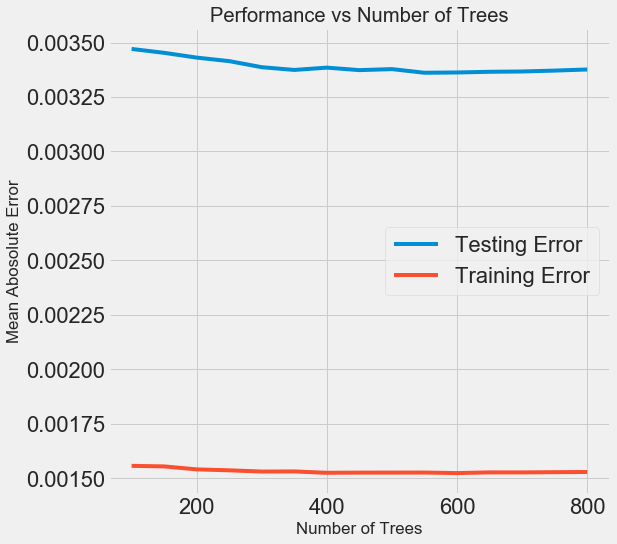

In [55]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

In [56]:
results.sort_values('mean_test_score', ascending = False).head(5)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
9,6.398616,0.093181,0.259765,0.153245,550,{'n_estimators': 550},-0.003350,-0.003674,-0.003053,-0.003369,-0.003361,0.000220,1,-0.001537,-0.001366,-0.001640,-0.001560,-0.001526,0.000100
10,6.042096,0.623112,1.531088,0.374308,600,{'n_estimators': 600},-0.003371,-0.003666,-0.003056,-0.003358,-0.003363,0.000216,2,-0.001535,-0.001360,-0.001647,-0.001551,-0.001523,0.000103
11,7.879951,0.160459,0.214762,0.173999,650,{'n_estimators': 650},-0.003377,-0.003678,-0.003051,-0.003358,-0.003366,0.000222,3,-0.001535,-0.001372,-0.001646,-0.001553,-0.001527,0.000099
12,7.509180,0.973921,1.333076,0.441838,700,{'n_estimators': 700},-0.003376,-0.003708,-0.003052,-0.003333,-0.003367,0.000233,4,-0.001533,-0.001379,-0.001644,-0.001550,-0.001526,0.000095
13,8.997515,0.274119,0.363021,0.213341,750,{'n_estimators': 750},-0.003375,-0.003716,-0.003059,-0.003336,-0.003371,0.000233,5,-0.001528,-0.001383,-0.001650,-0.001548,-0.001527,0.000095


### Тест ва ташқи тўпламларида якуний моделни баҳолаш.
Синовлар тўпламида башорат қилиш учун гиперпараметрни созлашнинг энг яхши моделидан фойдаланамиз. Бизнинг моделимиз илгари ҳеч қачон синовлар тўпламини кўрмаган эди, шунинг учун ушбу кўрсаткич ҳақиқий дунёда жойлаштирилган тақдирда модел қандай ишлашини кўрсатадиган яхши кўрсаткич бўлиши керак.

Таққослаш учун биз стандарт моделнинг ишлашига ҳам қарашимиз мумкин. Қуйидаги код якуний моделни яратади, уни ўргатади (вақт билан) ва тест тўпламида баҳолайди.


In [57]:
# Default model
default_model = ExtraTreesRegressor(random_state = 42)

# Select the best model
final_model = grid_search.best_estimator_

final_model

RandomForestRegressor(max_depth=8, max_features=None, min_samples_leaf=2,
                      n_estimators=550, n_jobs=-1, random_state=42)

In [58]:
%%timeit -n 1 -r 5
default_model.fit(X_train, y_train)

846 ms ± 15.4 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [59]:
%%timeit -n 1 -r 5
final_model.fit(X_train, y_train)

1.42 s ± 25.1 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [62]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

default_pred_ext = default_model.predict(X_external)
final_pred_ext = final_model.predict(X_external)

from sklearn.metrics import r2_score

def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))



print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))
print('Default model performance on the test set: R2 = %0.4f.' % r2_score(y_test, default_pred))
print('Final model performance on the test set:   R2 = %0.4f.' % r2_score(y_test, final_pred))

print('Default model performance on the external set: MAE = %0.4f.' % mae(y_external, default_pred_ext))
print('Final model performance on the external set:   MAE = %0.4f.' % mae(y_external, final_pred_ext))
print('Default model performance on the external set: R2 = %0.4f.' % r2_score(y_external, default_pred_ext))
print('Final model performance on the external set:   R2 = %0.4f.' % r2_score(y_external, final_pred_ext))

Default model performance on the test set: MAE = 0.0008.
Final model performance on the test set:   MAE = 0.0017.
Default model performance on the test set: R2 = 0.9900.
Final model performance on the test set:   R2 = 0.9806.
Default model performance on the external set: MAE = 0.0011.
Final model performance on the external set:   MAE = 0.0025.
Default model performance on the external set: R2 = 0.9814.
Final model performance on the external set:   R2 = 0.9678.


Якуний модел бошланғич моделдан тахминан 2 фоизга яхшироқ бажарди бажарди, аммо иш вақтининг сезиларли даражада кўпайиши олиб келди. Машинали ўқитиш кўпинча келишмовчиликлар соҳасидир: аниқлик ва талқин қилиниши, аниқлик ва иш вақти, ва қайси моделдан фойдаланишнинг якуний қарори вазиятга боғлиқ. Бу ерда иш вақтининг кўпайиши тўсиқ эмас, чунки нисбий фарқ катта бўлмасада, машғулот вақтининг мутлақ катталиги аҳамиятли эмас. Бошқа вазиятда мувозанат бир хил бўлмаслиги мумкин, шунинг учун биз нимани оптималлаштираётганимизни ва ишлашимиз керак бўлган чекловларни ҳисобга олишимиз керак.

Башоратларни тушуниш учун биз синовлар тўпламидаги ҳақиқий қийматларнинг тақсимланишини ва синовлар тўпламидаги тахмин қилинган қийматларни чизишимиз мумкин.


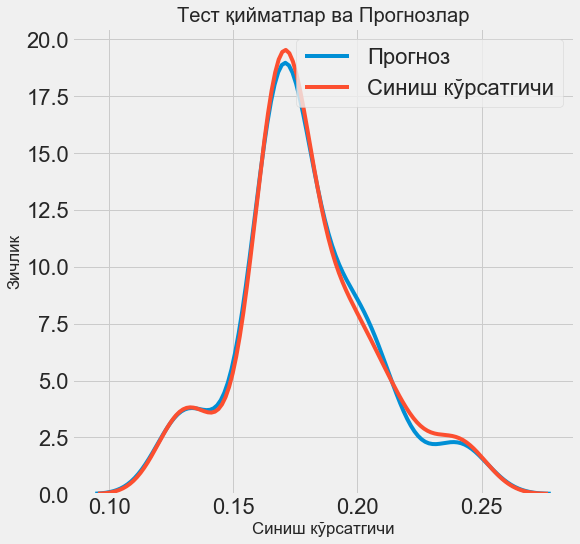

In [65]:
figsize(8, 8)

# Density plot of the final predictions and the test values
sns.kdeplot(default_pred, label = 'Прогноз')
sns.kdeplot(y_test, label = 'Синиш кўрсатгичи')

# Label the plot
plt.xlabel('Синиш кўрсатгичи'); plt.ylabel('Зичлик');
plt.title('Тест қийматлар ва Прогнозлар');

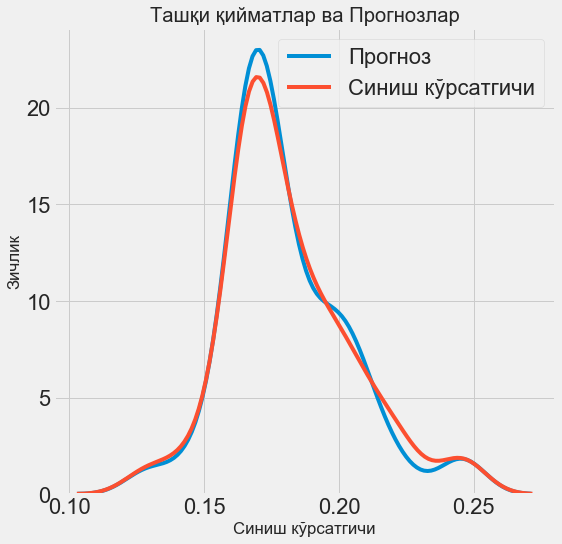

In [67]:
figsize(8, 8)

# Density plot of the final predictions and the test values
sns.kdeplot(final_pred_ext, label = 'Прогноз')
sns.kdeplot(y_external, label = 'Синиш кўрсатгичи')

# Label the plot
plt.xlabel('Синиш кўрсатгичи'); plt.ylabel('Зичлик');
plt.title('Ташқи қийматлар ва Прогнозлар');

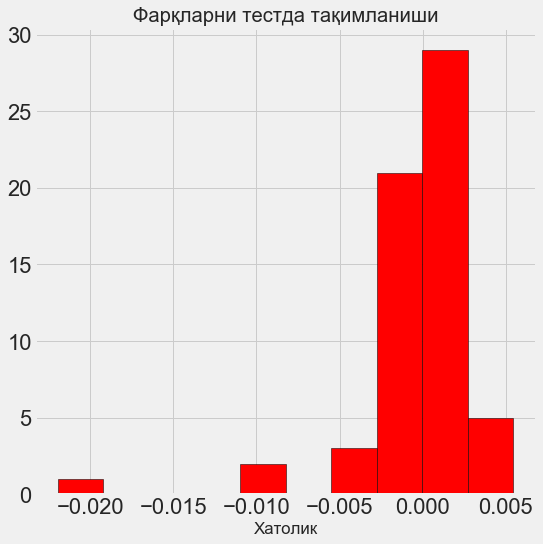

In [69]:
figsize = (6, 6)

# Calculate the residuals 
residuals = final_pred - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 10,
         edgecolor = 'black')
plt.xlabel('Хатолик'); 
plt.title('Фарқларни тестда тақимланиши');

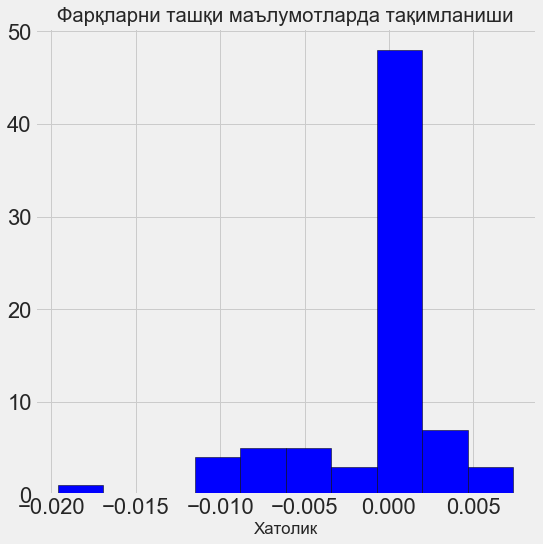

In [70]:
figsize = (6, 6)

# Calculate the residuals 
residuals = final_pred_ext - y_external


# Plot the residuals in a histogram
plt.hist(residuals, color = 'blue', bins = 10,
         edgecolor = 'black')
plt.xlabel('Хатолик'); 
plt.title('Фарқларни ташқи маълумотларда тақимланиши');